# 01_Data_Visualization_Teste

## TL;DR
Fazer uma descrição de 3 linhas do objetivo do notebook e conclusões presentes na análise.

## Objetivo

Descrever com clareza qual o objetivo desse notebook.

## Dados

Descrever a base de dados utilizada.

## Modelos (opcional)

Em caso de treinamento ou comparação de modelos, descrever os modelos considerados

## Conclusões
Listar **todas** as conclusões obtidas no notebook:
1. conclusão 1
2. conclusão 2
3. etc.


## Observações importantes:
1. Sempre organize o conteúdo utilizando células markdown e seções. Também utilize células de texto para escrever sua análise das figuras que forem geradas.
2. Lembre-se que essa primeira célula deve ter informação suficiente para entender o que foi feito e quais conclusões você chegou, sem ter que ler o notebook inteiro. Isso agiliza muito a busca por informações ao longo do projeto. Além disso, seu eu do futuro (ou novas pessoas que entrem no projeto) vai agradecer se o seu notebook estiver bem escrito e completo.

# Importando as Bibliotecas

In [84]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw


# Importando Dataset

In [68]:
# Caminho da pasta onde estão as subpastas dos voluntários
root_dir = "../../data/data_cluster"  # Altere para o caminho correto do seu sistema

# Configuração de estilo dos gráficos
sns.set(style="whitegrid")

# Importando Bibliotecas para Visualização de Dados

In [69]:
def carregar_dados(root_dir):
    """
    Lê todos os arquivos .csv de subpastas e retorna um DataFrame consolidado.
    """
    all_data = []
    for voluntario in os.listdir(root_dir):
        pasta = os.path.join(root_dir, voluntario)
        if os.path.isdir(pasta):
            for arquivo in os.listdir(pasta):
                if arquivo.endswith('.csv'):
                    caminho_arquivo = os.path.join(pasta, arquivo)
                    try:
                        df = pd.read_csv(caminho_arquivo)
                        df['voluntario'] = voluntario
                        all_data.append(df)
                    except Exception as e:
                        print(f"Erro ao ler {caminho_arquivo}: {e}")
    return pd.concat(all_data, ignore_index=True)

dados = carregar_dados(root_dir)

print(f"Total de amostras carregadas: {dados.shape[0]}")
dados.head()

Total de amostras carregadas: 25931


,626.6068,-0.078125,1.129883,0.1328125,3.71875,-9.46875,-1.34375,-0.2080078,-0.01171875,0.8037109,...,0.8925781,0.9853516,-0.1113281,2.59375,191.2656,93.42404,260.6633,145.1859,289.9967,257.6203
0,626.6403,-0.078125,1.129883,0.132812,3.71875,-9.46875,-1.34375,-0.208008,-0.011719,0.803711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,626.6739,-0.078125,1.129883,0.132812,3.71875,-9.46875,-1.34375,-0.208008,-0.011719,0.803711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,626.7075,-0.061523,1.046875,-0.089844,-1.25000,-13.03125,-6.37500,-0.208008,-0.011719,0.803711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,626.7408,-0.061523,1.046875,-0.089844,-1.25000,-13.03125,-6.37500,-0.208008,-0.011719,0.803711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,626.7742,-0.061523,1.046875,-0.089844,-1.25000,-13.03125,-6.37500,-0.208008,-0.011719,0.803711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Selecionar colunas numéricas
colunas_numericas = dados.select_dtypes(include=np.number).columns

# Pegar as últimas 6 colunas
ultimas_colunas = colunas_numericas[-6:]

print("Colunas selecionadas para análise:")
print(ultimas_colunas)

# Filtrar apenas essas colunas
dados_numericos = dados[ultimas_colunas]

# Tratar valores ausentes (substituir pela média)
dados_numericos = dados_numericos.fillna(dados_numericos.mean())
# Verificar resultado
print(f"Shape final dos dados usados no KMeans: {dados_numericos.shape}")


Colunas selecionadas para análise:
Index(['191.2656', '93.42404', '260.6633', '145.1859', '289.9967', '257.6203'], dtype='object')
Shape final dos dados usados no KMeans: (25931, 6)


In [76]:
# Número de clusters (definido manualmente aqui como 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(dados_numericos)


# Adicionando cluster ao DataFrame original
# Criar uma cópia do DataFrame antes de adicionar a coluna
dados_copy = dados.copy()

# Adicionar a coluna 'cluster' à cópia do DataFrame
dados_copy['cluster'] = clusters


In [77]:
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(dados_numericos)


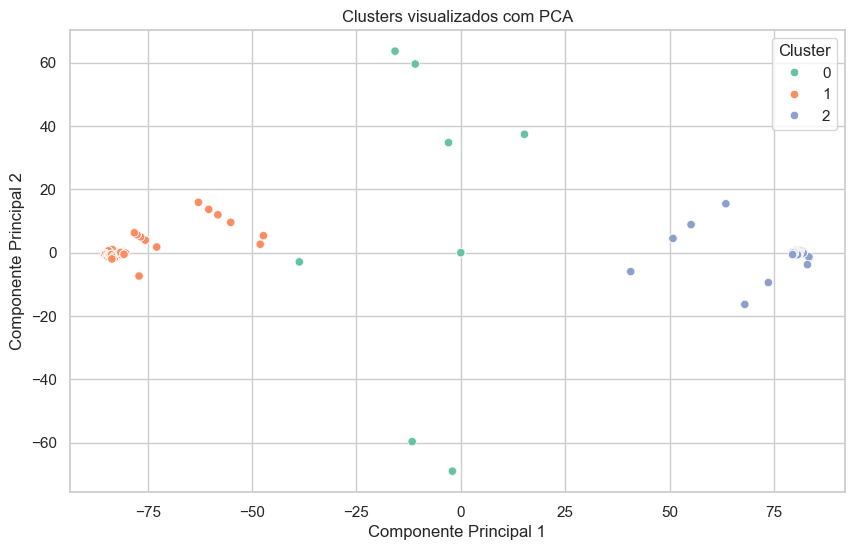

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=dados_pca[:, 0],
    y=dados_pca[:, 1],
    hue=clusters,
    palette='Set2',
    legend='full'
)
plt.title("Clusters visualizados com PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


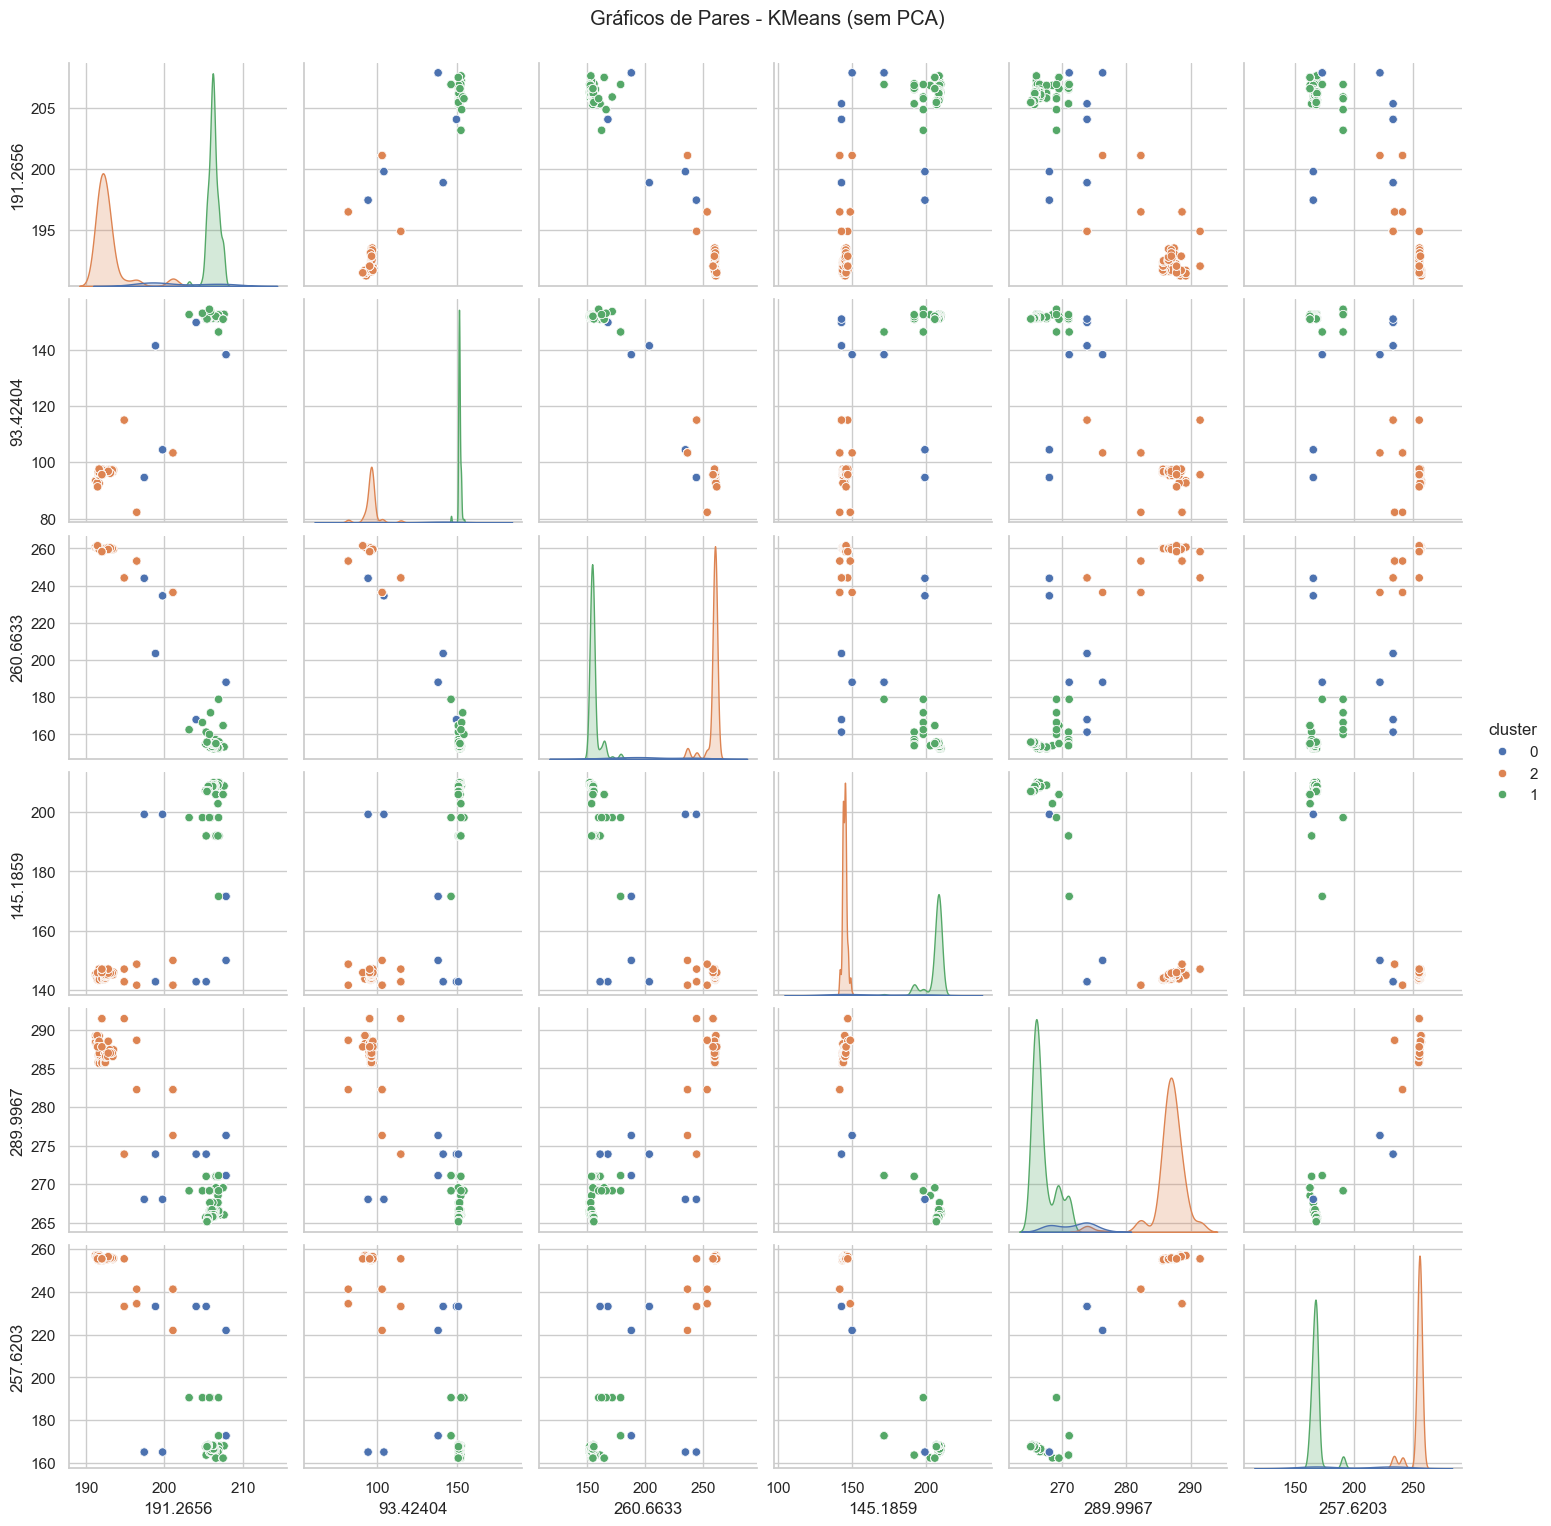

In [79]:
# Visualizar os dados em gráficos de pares (pairplot) por cluster
import seaborn as sns

# Criar um DataFrame para visualização com os clusters
df_visualizacao = dados.copy()
df_visualizacao['cluster'] = clusters.astype(str)

# Usar o seaborn pairplot para plotar gráficos de dispersão para todas as colunas
sns.pairplot(df_visualizacao, hue='cluster', vars=ultimas_colunas)
plt.suptitle("Gráficos de Pares - KMeans (sem PCA)", y=1.02)
plt.show()


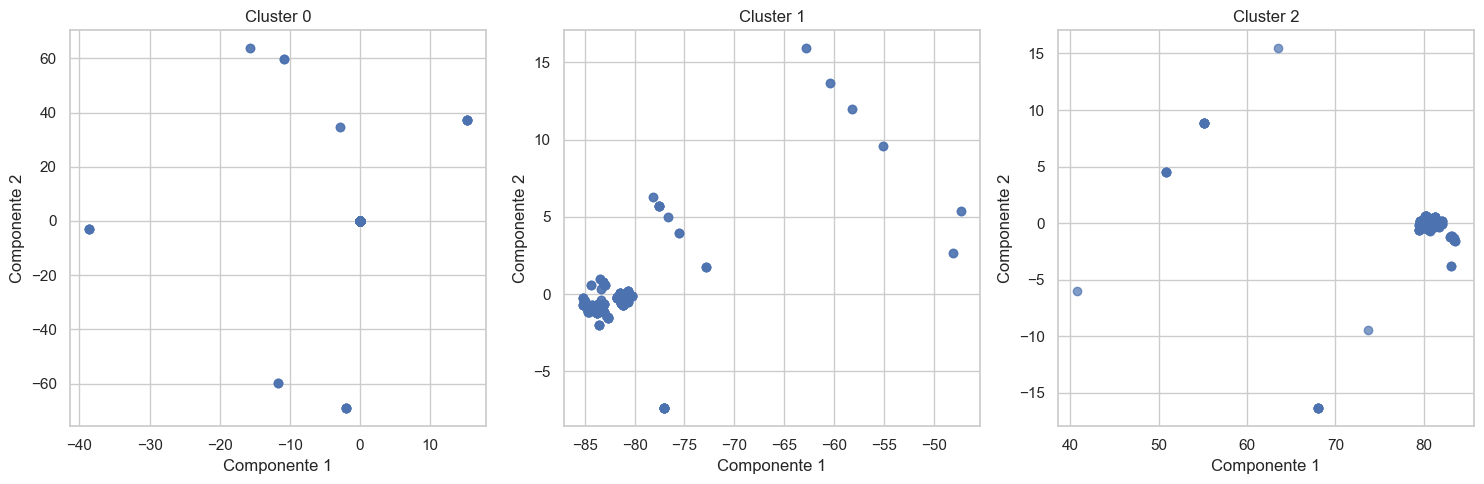

In [80]:
import matplotlib.pyplot as plt

# PCA já aplicado: dados_pca
# Clusters já atribuídos: clusters

num_clusters = len(np.unique(clusters))

plt.figure(figsize=(15, 5))
for i in range(num_clusters):
    plt.subplot(1, num_clusters, i + 1)
    plt.scatter(
        dados_pca[clusters == i, 0],
        dados_pca[clusters == i, 1],
        label=f"Cluster {i}",
        alpha=0.7
    )
    plt.title(f"Cluster {i}")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.grid(True)
plt.tight_layout()
plt.show()


# Conclusões

Aqui você deve listar todas as conclusões obtidas ao longo do notebook.
Pode copiar todo o conteúdo dessa seção lá na parte de conclusões do cabeçalho.